|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca//images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

## Sections  0, 1 et 2: Sections 1.0, 1.1 et 1.2: la viscosité des fluides et comment la viscosité affecte le mouvement des fluides. 
>#### Pour les deux premières sections, lire les pages 1-23 du document suivant:
>http://gch200-pp.espaceweb.usherbrooke.ca/Chap1.pdf 
#### elles vous présentent le concept de viscosité et donnent des exemples de valeurs typiques des viscosités de certains fluides. 

# *

## Section 1.3, calcul de la viscosité réduite de fluides. La température, la pression et la viscosité sont normalisées en les divisant par la propriété critique. Le graphe 1.3-1 montre ces viscosités réduites.

> #### Les packages python "CoolProp" et "thermo" ont été développés pour calculer les propriétés thermodynamiques et de transport en utilisant les méthodes les plus récentes de calcul. Au lieu d'utiliser la figure 1.3-1 et l'annexe E pour estimer la viscosité en fonction de la température et de la pression, il est facile de trouver la viscosité en utilisant simplement, par exemple pour la viscosité du CO2 à 300 K et 101325 Pascals (1 atm):
    from CoolProp.CoolProp import PropsSI
    muCO2C=PropsSI('V','T',300,'P',101325,'CO2')
    import thermo as th
    CO2=th.Chemical('CO2',T=300,P=101325)   # thermo utilise une approche objet
    print(muCO2C,CO2.mug)                   # ainsi CO2.mug est la viscosité à l'état gazeux du CO2
#### Dans ce qui suit, on utilise CoolProp pour reconstruire le graphe 1.3-1. Par la suite on utilisera aussi thermo

#### Voyons d'abord si le calcul des propriétés critiques est bien fait, comparons avec l'annexe E, rappelons-nous que le SI est pour Système International, donc Mètres, Kilogramme, Seconde, Joule, etc... Pas d'unités mixtes comme les poises, les atmosphères, les PSI, les livres-forces, et autres unités développées sans standard cohérent. Vérifiez dans l'annexe E si les calculs de CoolProp coincident bien avec les données de Transport Phenomena.

In [1]:
from CoolProp.CoolProp import PropsSI
muCO2C=PropsSI('V','T',300,'P',101325,'CO2')
print(muCO2C)

1.5021470647392787e-05


In [2]:
import thermo as th
CO2=th.Chemical('CO2',T=300,P=101325)
print(CO2.mug)

1.5021470647392787e-05


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI
%matplotlib inline
print(('{:<12}'*4).format('Fluide','Tc (K)','Pc (Pa)','muc (Pa*s)'))
print('-'*48)
for fluide in ['methane','ethane','propane','argon','N2','O2','CO2','air']:
    Tc=PropsSI('Tcrit',fluide)
    Pc=PropsSI('Pcrit',fluide)
    vc=PropsSI('V','T',Tc,'P',Pc,fluide)
    print('{:<12}{:<12.3f}{:<12.3e}{:<12.3e}'.format(fluide,Tc,Pc,vc))

Fluide      Tc (K)      Pc (Pa)     muc (Pa*s)  
------------------------------------------------
methane     190.564     4.599e+06   1.593e-05   
ethane      305.322     4.872e+06   2.201e-05   
propane     369.890     4.251e+06   2.393e-05   
argon       150.687     4.863e+06   2.731e-05   
N2          126.192     3.396e+06   1.808e-05   
O2          154.581     5.043e+06   2.632e-05   
CO2         304.128     7.377e+06   3.404e-05   
air         132.531     3.786e+06   2.008e-05   


#### Maintenant construisons le graphe en nous basant sur la figure 1.3-1

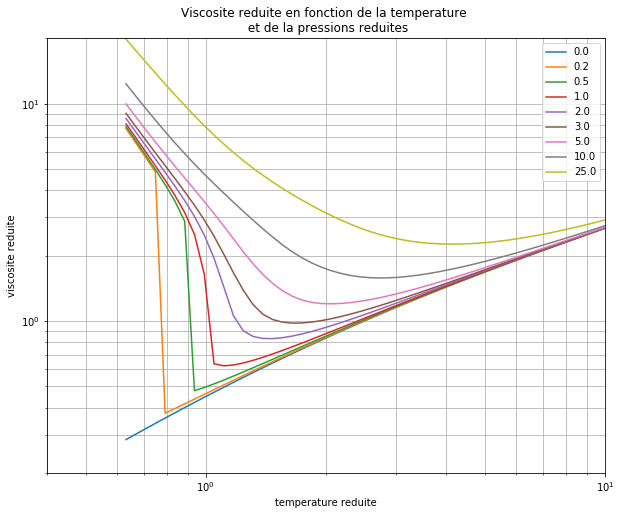

In [4]:
fluide='argon'
Tc=PropsSI('Tcrit',fluide)
Pc=PropsSI('Pcrit',fluide)
vc=PropsSI('V','T',Tc,'P',Pc,fluide)

T = np.logspace(-0.2, 1)          
P = [0.001,0.2,0.5,1,2,3,5,10,25]

vr = np.zeros((len(T),len(P)))
for i,Tr in enumerate(T):
    for j,Pr in enumerate(P):
        vr[i,j]=PropsSI('V','T',Tr*Tc,'P',Pr*Pc,fluide)/vc

plt.rcParams['figure.figsize'] = 10,8   
plt.loglog(T,vr)
plt.xlabel('temperature reduite')
plt.ylabel('viscosite reduite')
plt.grid(True,which="both")
vr=[0.4,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20]
plt.xlim(0.4,10)
plt.ylim(0.2,20)
plt.legend(['{:0.1f}'.format(p) for p in P])
plt.title('Viscosite reduite en fonction de la temperature \n et de la pressions reduites')
plt.show()

#### Comparez avec la figure 1.3-1, vous verrez que les résultats sont très similaires. On peut donc utiliser CoolProp avec confiance sur une grande gamme de températures et de pressions pour gaz et liquides.

<img src='http://pierreproulx.espaceweb.usherbrooke.ca//images/Chap-1-Figure-1-3.png'>

# *

## Section 1.4, calcul des viscosités de gaz à des pressions inférieures à 10% de la pression critique (CoolProp et thermo)

La viscosité individuelle peut être à partir de l'équation 1.4-14 en utilisant l'annexe E2.

>>> $
\begin{equation*}
  \boxed{ 
          \mu = 2.6693 \times 10^{-5} \frac{\sqrt{MT}}{\sigma^2 \Omega_{\mu}}
           }
  \end{equation*}
$ 


> Cependant, on a vu CoolProp qui effectue ce calcul, maintenant regardons comment un autre package python (thermo) utilise lui-même CoolProp pour calculer la viscosité à partir de 1.4-14, et utilise une syntaxe qui peut sembler plus facile et ajoute les calculs de mélange de gaz comme l'équation 1.4-15, 1.4-16 (Wilkes). 
>Pour un  mélange de gaz on peut approximer la viscosité en utilisant une pondération proposée par Wilkes en 1949.

>>> $
\begin{equation*}
  \boxed{
          \mu_{mix} = \sum_{i=0}^N \frac {x_i \mu_i} {\sum_{j=0}^N (x_j \phi_{ij})}
        }
\end{equation*}
$


avec 

>>> 
$ \begin{equation*}
  \boxed{
          \phi_{ij} = \frac {1} { \sqrt{8} }
                     \bigg ( 1+ \frac{M_i}{M_j} \bigg )^{-1/2}
                     \bigg [ 1+ \bigg ( \frac{\mu_i}{\mu_j} \bigg )^{1/2}
                     \bigg ( \frac{M_j}{M_i} \bigg )^{1/4}
                     \bigg ]^{2}
        }
        \end{equation*}
   $

 Voyons comment thermo résoud l'exemple 1.4-1. Il calcule les viscosités individuelles des 3 gaz en utilisant 1.4-14, 1.4-15 et 1.4-16. Le résultat est légèrement différent de celui de Transport Phenomena, pas moins précis.

In [5]:
# package thermo
import thermo as th
#
# regardons d'abord comment thermo calcule la viscosité d'un gaz et comparons avec
# la syntaxe de Coolprop
thermoMu   = th.Chemical('CO2',300,101325).mu
coolPropMu = PropsSI('V','T',300,'P',101325,'CO2')
ExempleMu  = th.Mixture(['CO2','O2','N2'],zs=[0.133,0.039,0.828],T=293).mu

print('Avec thermo               : {:8.3e}'.format(thermoMu))
print('Avec Coolprop             : {:8.3e}'.format(coolPropMu))
print('Calcul de l exemple 1.4-1 : {:8.3e}'.format(ExempleMu))

Avec thermo               : 1.502e-05
Avec Coolprop             : 1.502e-05
Calcul de l exemple 1.4-1 : 1.744e-05


# *

## Section 1.5, calcul des viscosités de liquides (CoolProp et thermo)

>> Avec thermo, le calcul des propriétés des liquides est très simple et très naturel, par exemple pour l'eau liquide ou la vapeur d'eau à 50 degrés C et pression atmosphérique (on utilise toujours des unités du système international dans thermo et CoolProp, donc P=101325 Pascals = 1 atmosphère):

In [6]:
print(th.Chemical('water',273+50,101325).mug)
# une autre façon de faire le même travail, utilisant la nature objet du programme thermo
eau=th.Chemical('water',273+50,101325)
eau.mug

1.0511439780362781e-05


1.0511439780362781e-05

In [7]:
print(th.Chemical('water',273+50,101325).mul)
# ou puisqu'on a déjà défini l'objet eau de la classe Chemical, avec les T et P précédents
eau.mul   # on a pas besoin de print, car la dernière ligne de chaque cellule est imprimée...

0.0005478953637518819


0.0005478953637518819

#### Comparons les valeurs obtenues avec thermo avec celles des équations proposées dans Transport Phenomena

In [8]:
# viscosité du benzène, exemple 1.5-1
print(th.Chemical('benzene', T=273+20, P=101325).mul)

0.0006482417530392874


#### Le résultat est bien meilleur, on peut le comparer avec le tableau 1.1-3, donc on utilisera donc thermo pour le calcul des viscosités des liquides. Continuons à comparer les valeurs prédites par thermo avec le tableau 1.1-3. Les méthodes utilisées par CoolProp et thermo pour calculer la viscosité des liquides sont beaucoup plus précises que celle proposée dans la section 1.5, alors on utilisera thermo.

In [9]:
print('***Tableau 1.1-3 Transport Phenomena, à comparer\n')
#Nom, Nom Thermo, temperature (°C), pression (kPa)
elements=[
    ['brome','bromine',   25,101.325],
    ['C2H5OH  0°C','C2H5OH',    0,101.325],
    ['C2H5OH 25°C','C2H5OH',    25,101.325],
    ['C2H5OH 50°C','C2H5OH',    50,101.325],
    ['Mercure','mercury', 20,101.325]
]

for elem in elements:
    mul=th.Chemical(elem[1], T=273+elem[2], P=elem[3]*1000).mul
    print('{:<20}{:10.6e} Pa*s'.format(elem[0],mul))

***Tableau 1.1-3 Transport Phenomena, à comparer

brome               9.755912e-04 Pa*s
C2H5OH  0°C         1.824754e-03 Pa*s
C2H5OH 25°C         1.085494e-03 Pa*s
C2H5OH 50°C         6.907656e-04 Pa*s
Mercure             1.558125e-03 Pa*s


# *

## Section 1.6- Calcul de la viscosité des suspensions.

En 1906, un jeune chercheur totalement inconnu de 27 ans propose une expression qui permet de calculer la viscosité de suspensions (diluées) de sphères solides dans un liquide. Cette expression se lit:

>>> $
\begin{equation*}
  \boxed{ 
          \frac {\mu_{eff}}{\mu_0}= 1 + \frac {5}{2}\phi
           }
  \end{equation*} (1.6-1)
$ 

En fait, il y avait une petite erreur de calcul, au lieu de 5/2 Einstein a donné 2 comme coefficient devant $\phi$. Il l'a corrigée quelques années plus tard, en 1911.

Cette équation a été utilisée comme base pour plusieurs travaux par la suite , celle de Mooney par exemple:

>>> $
\begin{equation*}
  \boxed{ 
          \frac {\mu_{eff}}{\mu_0}= exp \bigg(
                                      { \frac  {\frac {5}{2} \phi} {1-(\phi/\phi_0)} } \bigg )
           }
  \end{equation*} (1.6-2)
$ 


La cellule suivante effectue l'implémentation de la formule de Mooney et la compare avec un travail (Vand et al.) ou les auteurs ont lissé des résultats expérimentaux. C'est l'exercice 1B-3

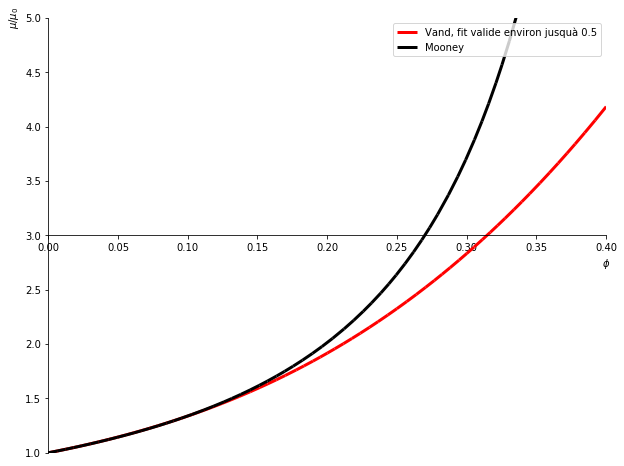

In [10]:
# Exercice 1B3
#
import sympy as sp
from IPython.display import *
from matplotlib import rcParams
%matplotlib inline

sp.init_printing(use_latex=True)
phi,phi0=sp.symbols('phi,phi_0')
muV=sp.Function('mu_V')(phi)
muV=1+2.5*phi+7.17*phi**2+16.2*phi**3
muM=sp.Function('mu_M')(phi)
muM=sp.exp((5./2.*phi)/(1-phi/phi0))
muM=muM.subs(phi0,0.7)
rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = 10,8   
p1=sp.plot(muV,(phi,0,0.4),ylim=(1,5),legend=True,
           xlabel='$\phi$',ylabel='${\mu/\mu_0}$',show=False)
p2=sp.plot(muM,(phi,0,0.4),ylim=(1,5),show=False)
p1.append(p2[0])
p1[0].label='Vand, fit valide environ jusqu''à 0.5'
p1[0].line_color='red'
p1[1].label='Mooney'
p1[1].line_color='black'
p1.show()

> #### On constate que l'approximation de Mooney n'est valide que pour des valeurs de $\phi$ qui ne dépassent pas 25%, environ. Une suspension qui contient 25% par volume de solides est considérée habituellement comme très concentrée.

# *

### Section 1.7: Flux de quantité de mouvement.

>http://pierreproulx.espaceweb.usherbrooke.ca//images/GCH200_Ch1_resume.pdf